# Feature extraction

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from seaborn import pairplot, heatmap
from sklearn.metrics import median_absolute_error, r2_score
from camcan.datasets import load_camcan_behavioural
from camcan.datasets import load_camcan_behavioural_feature
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.preprocessing import Imputer
from sklearn.model_selection import KFold, cross_val_predict
%matplotlib inline

In [2]:
data_directory = "/home/arthur/arthur_imbert/dev/cc700-scored"
path_data = os.path.join(data_directory, "total_score.csv")
path_features_map = os.path.join(data_directory, "behavioural_features.json")
path_participant_info = os.path.join(data_directory, "participant_data.csv")
path_selected_features = \
    "/home/arthur/arthur_imbert/dev/camcan_analysis/data/features"

In [3]:
experiences = ["BentonFaces",
               "CardioMeasures",
               "Cattell",
               "EkmanEmHex",
               "EmotionalMemory",
               "EmotionRegulation",
               "FamousFaces",
               "ForceMatching",
               "HomeInterview",
               "Hotel",
               "MotorLearning",
               "MRI",
               "PicturePriming",
               "Proverbs",
               "RTchoice",
               "RTsimple",
               "Synsem",
               "TOT",
               "VSTMcolour"]

## Functions

In [16]:
def get_df_experiment(name_experience, path_features_map, path_data,
                      path_participant_info):
    """
    Function to make a dataframe from an experiment ready to be plotted
    :param name_experience: str,
                name of the experience to export
    :param path_features_map: str,
                path of the json file containing the map of the features
    :param path_data: str,
                path of csv file containing all the behavioural datasets
    :param path_participant_info: str,
                path of the csv file containing the variable age
    :return: dataframe
    """
    features_exp = load_camcan_behavioural_feature(
        name_experiment=name_experience,
        exp_feat_map_json=path_features_map)
    features_to_load = ["Observations"] + [c for c in features_exp]
    dataset = load_camcan_behavioural(filename_csv=path_data,
                                      patients_info_csv=path_participant_info,
                                      patients_excluded=None,
                                      column_selected=features_to_load)
    X = dataset.data
    y = dataset.scores.age
    features_to_plot = [feat for feat in features_exp
                        if X[feat].dtypes != object 
                        and X[feat].isnull().sum() < 100]
    if len(features_to_plot) == 0:
        return None
    else:
        X = X[features_to_plot]
    
    imp = Imputer()
    X = imp.fit_transform(X)
    X = pd.DataFrame(data=X,
                     columns=features_to_plot)
    X["age"] = y
    return X


def plot_heatmap_correlation(name_experience, df):
    """
    Function to plot a heatmap of the features' correlation
    :param name_experience: str
    :param df: dataframe
    :return:
    """
    heatmap(df.corr())
    plt.xticks(rotation='vertical')
    plt.yticks(rotation="horizontal")
    plt.title(name_experience, fontsize="larger", fontweight="bold")
    plt.show()
    return


def plot_pairplot_correlation(name_experience, df):
    """
    Function to plot a pairplot of the features
    :param name_experience: str
    :param df: dataframe
    :return:
    """
    pairplot(df)
    plt.title(name_experience, fontsize="larger", fontweight="bold")
    plt.show()
    return


def plot_exp(experience):
    """
    Function to plot a heatmap from a specific experience
    :param experience: str
    :return: 
    """
    X = get_df_experiment(experience, path_features_map, path_data,
                          path_participant_info)
    if X is None:
        return
    else:
        plot_heatmap_correlation(experience, X)
    return

## Plot per experiment

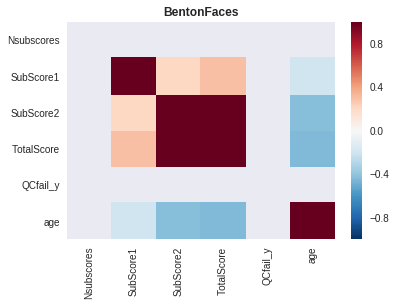

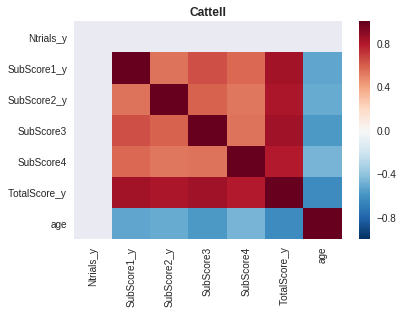

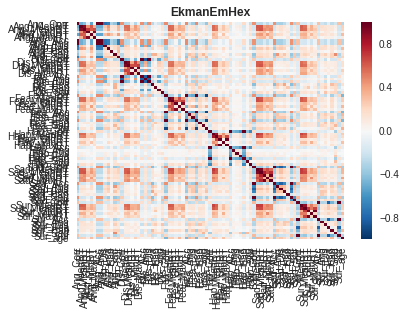

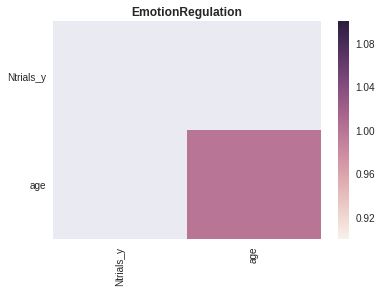

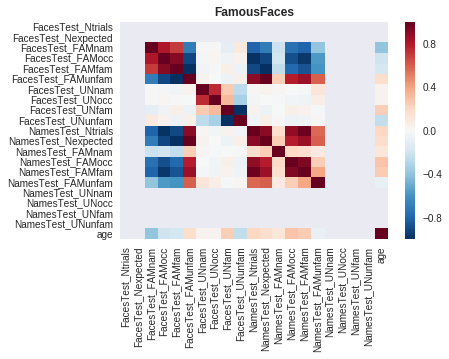

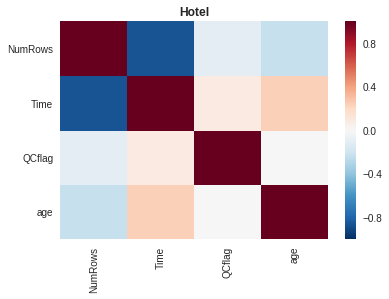

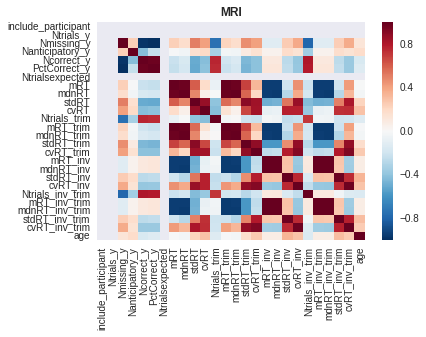

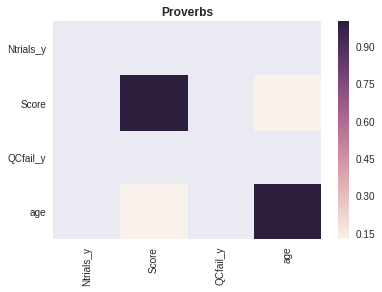

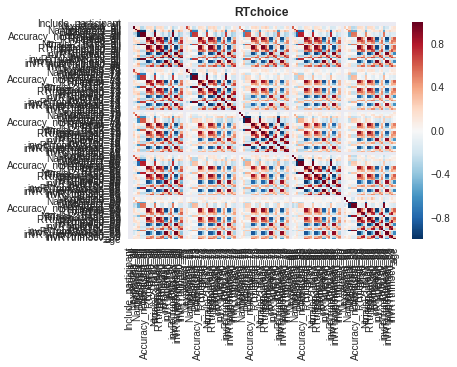

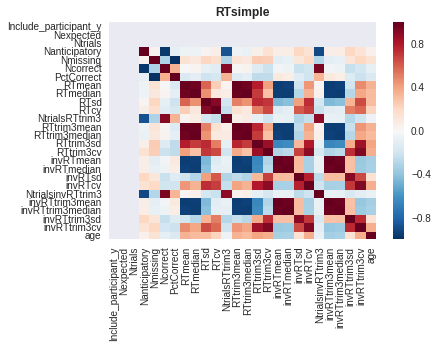

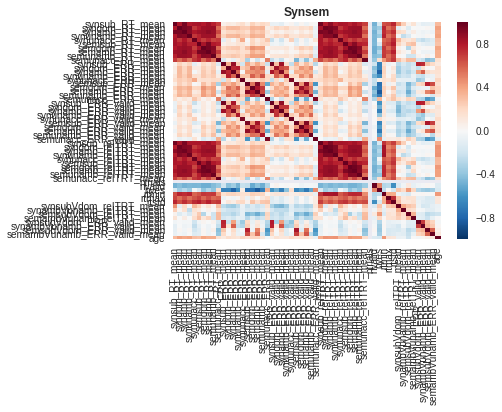

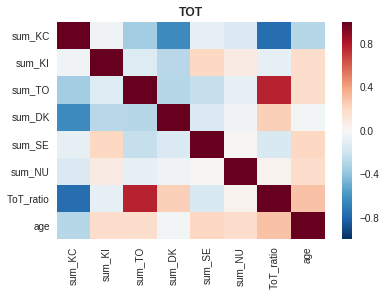

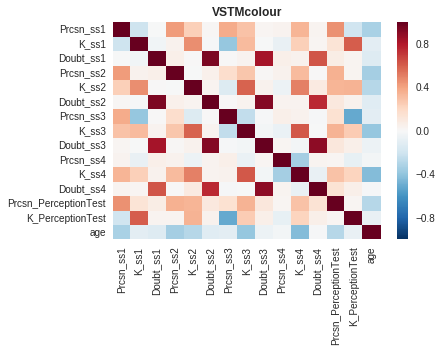

In [17]:
# plot correlation for each experiment
for exp in experiences:
    plot_exp(exp)

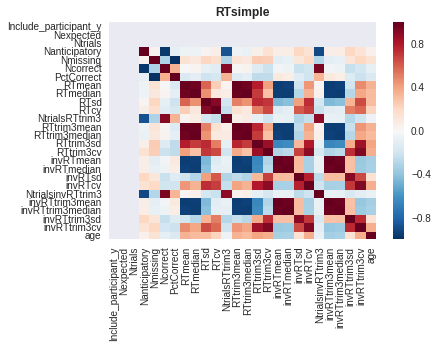

In [20]:
plot_exp("RTsimple")